# Part1 线性回归

线性回归输出是一个连续值，因此适用于回归问题。回归问题在实际中很常见，如预测房屋价格、气温、销售额等连续值的问题。与回归问题不同，分类问题中模型的最终输出是一个离散值。我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。softmax回归则适用于分类问题。

由于线性回归和softmax回归都是单层神经网络，它们涉及的概念和技术同样适用于大多数的深度学习模型。我们首先以线性回归为例，介绍大多数深度学习模型的基本要素和表示方法。

我们以一个简单的房屋价格预测作为例子来解释线性回归的基本要素。这个应用的目标是预测一栋房子的售出价格（元）。我们知道这个价格取决于很多因素，如房屋状况、地段、市场行情等。为了简单起见，这里我们假设价格只取决于房屋状况的两个因素，即面积（平方米）和房龄（年）。接下来我们希望探索价格与这两个因素的具体关系。


## 模型定义

设有屋顶面积为 $x_1$，房间数为 $x_2$，售出价格为 $y$。我们需要建立一个模型 $x_1$ 和 $x_2$ 来计算预测售出价格 $\hat{y}$，也就是模型（model）。 

模型是关于参数的数学表达式，数学上我们可以将模型表示为：

$$
\hat{y} = x_1w_1 + x_2w_2 + b
$$

其中 $w_1$ 和 $w_2$ 是权重（weight），$b$ 是偏差（bias），且均为标量。它们是模型的可学习参数（parameter）。模型输出 $\hat{y}$ 是对售出价格 $y$ 的预测或者估计。我们通常在训练过程中寻找一组最优的参数使得 $\hat{y}$ 和 $y$ 之间的差异最小化。


## 模型训练

接下来我们需要通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作模型训练（model training）。下面我们介绍模型训练所涉及的3个要素。

#### 1. 训练数据

我们通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为训练数据集（training data set）或训练集（training set），一栋房屋被称为一个样本（sample），其真实售出价格叫作标签（label），用来预测标签的两个因素叫作特征（feature）。特征用来表征样本的特点。

假设我们有数据集的样本数量为 $n$，索引为 $i$ 的样本的特征为 $x_1^{(i)}$ 和 $x_2^{(i)}$，标签为 $y^{(i)}$。对于索引为 $i$ 的样本，线性回归模型的预测输出表示为 $\hat{y}^{(i)}$。

$$
\hat{y}^{(i)} = x_1^{(i)} w_1 + x_2^{(i)} w_2 + b
$$

### 2. 损失函数

在模型训练中，我们需要衡量价格预测值与真实值之间的误差。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方函数。它在评估索引为 $i$ 的样本误差的表达式为

$$
\ell^{(i)}(w_1, w_2, b) = \frac{1}{2} (\hat{y}^{(i)} - y^{(i)})^2
$$

其中常数 \( \frac{1}{2} \) 便于对损失函数求导时的常数系数抵消，这样在正式上下求微分时一些常数项就自动为0。这个式子是均方误差MSE，它很像方差。给定训练数据集，这个损失函数与整体数据集相关，因此我们将它们加以求和以获得整个数据集的损失。在机器学习里，我们常用损失函数来衡量预测值与真实值之间的差距。这里使用的平方损失函数是最常见的损失函数之一，也称为均方误差（mean squared error，MSE）或平方损失（square loss）。


相应的，总的MSE为
$$
MSE = \frac{1}{n} \sum_{i=1}^n(\hat{y}^{(i)} - y^{(i)})^2 
$$


据此，我们用所有数据点的损失函数的平均值来评估模型预测的质量，即

$$
\ell(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^n \ell^{(i)}(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)})^2
$$


在模型训练过程中，我们希望找到一组使损失最小化，记为 \( w_1^*, w_2^*, b^* \) 的最优解，即

$$
w_1^*, w_2^*, b^* = \text{arg min}_{w_1,w_2,b} \ell(w_1, w_2, b)
$$


### 2. 优化算法

当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫作解析解（analytical solution）。本节使用的线性回归和平方误差刚好属于这个范畴。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作数值解（numerical solution）。

在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量(mini-batch)$B$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。


在训练线性模型时使用批量梯度下降法，梯度的每个分量求和后取平均值：

$$
w_1 \leftarrow w_1 - \eta \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_1} = w_1 - \eta \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} x_1^{(i)}(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}),
$$

$$
w_2 \leftarrow w_2 - \eta \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_2} = w_2 - \eta \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} x_2^{(i)}(x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}),
$$

$$
b \leftarrow b - \eta \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial b} = b - \eta \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} (x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)}).
$$

在上式中，$\mathcal{B}$ 代表每个小批量中的样本个数（批量大小，batch size），\eta 表示学习率（learning rate）并且是超参数。梯度是损失函数相对于模型参数的局部导数，用于指示模型参数在哪个方向上调整可以减少损失。在批量梯度下降法中，超参数可以通过实验调整来优化学习效果。



这里的公式可能比较晦涩难懂，先说明，这里是用于更新线性回归模型的梯度下降公式，在这里模型试图通过调整权重 $\omega_1$、$\omega_1$ 和偏差项 $b$ 来最小化损失函数 $l$ 。损失函数则度量了模型预测值 $\hat{y}^(i)$ 与真实值 $y^(i)$ 之间差的平方

$\eta$ 是学习率，它决定了模型参数在每一步更新中应该移动的步长大小。它是超参数，意味着需要手动设置，不是通过模型学习得到的。我们通常所说的“调参”指的正是调节超参数，例如通过反复试错来找到超参数合适的值。在少数情况下，超参数也可以通过模型训练学出。本书对此类情况不做讨论。

$B$ 是一个批量的样本集合，这里使用批量是为了计算批量梯度下降。批量大小也是超参数，通常称为batch size

$\frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_1}$ 是损失函数关于权重 $\omega_1$ 的偏导数。这是说，它度量了当我们改变 $\omega_1$ 时，损失函数 $ℓ$ 的值如何变化


因此我们仔细看这里，$\omega_1, \omega_2, b$ 的更新数学表达式，也就是方程的左半部分

$$
w_1 \leftarrow w_1 - \eta \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_1} 
$$

$$
w_2 \leftarrow w_2 - \eta \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_2} 
$$

$$
b \leftarrow b - \eta \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial b}
$$

这里的 $\frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_1} , \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_2}, \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial b}$ 就是损失函数$l^(i)$关于 $\omega_1, \omega_2, b$ 的偏导数。

每次更新就是，减去梯度，因为梯度指示了更新的方向。

数学上，如果你有一个可微分的损失函数 $ \ell(w) $，其中 $ w $是模型参数，那么该损失函数相对于参数 $ w $的梯度 $ \nabla \ell(w) $ 就是损失函数在 $ w $ 点处的最陡上升方向。因此，要减少损失，我们需要向梯度的相反方向更新 $w$，即：

$$ w \leftarrow w - \eta \nabla \ell(w) $$

这里的 $eta $是学习率，它决定了每一步更新的大小。

- 如果学习率太小，收敛可能会非常慢。
- 如果学习率太大，可能会跳过最小值，甚至导致算法发散。

每次迭代中，使用批量梯度下降，我们会对一批样本计算梯度的平均值，然后用这个平均梯度来更新参数。这种方法在实际应用中常用，因为它比单个样本梯度更稳定，而且计算上更高效。


整个过程是这样的：

计算损失函数关于当前参数的梯度。
将每个参数更新为其当前值减去学习率乘以该参数梯度的平均值。
重复以上步骤，直到模型收敛到最小损失，或者达到一定的迭代次数。

Q: 我的理解是，梯度下降法就是通过求得增长最快的梯度，然后针对这个梯度对变量求偏导，然后减去这个偏导是嘛。同时由于需要求偏导，我们之前学了反向传播可以解决这个问题，是么，可以给我一个代码的例子么

A: 你的理解基本上是正确的。在梯度下降法中，我们首先计算损失函数相对于模型参数的梯度，这个梯度告诉我们损失函数在当前参数点上增长最快的方向。然后，我们对模型参数沿着梯度的反方向进行更新，从而使损失减小。

A: 反向传播是一种高效计算梯度的方法，特别是对于复杂的模型，如神经网络。在PyTorch中，当我们对一个张量进行操作并计算出一个结果时，如果张量被设置为 requires_grad=True，PyTorch会自动构建一个计算图，这个计算图记录了操作的顺序和关系。然后，当我们在最终结果上调用 .backward() 方法时，PyTorch会自动沿着这个计算图进行反向传播，计算每个参数的梯度。下面我们使用PyTorch进行一个简单的梯度下降

In [1]:
import torch

torch.manual_seed(42)

# 定义一个模型参数 w 和 b，并设置requires_grad=True以自动计算梯度
w = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

# 假设我们有一些数据 x 和对应的标签 y
x = torch.rand(20) * 10      # 随机生成20个[0, 10)范围内的数据点
y = 2 * x + 3 + torch.randn(20)  # y = 2x + 3 + 随机噪声


# 设置学习率
learning_rate = 0.01

# 定义模型预测的前向过程
def forward(x):
    return w * x + b

# 定义损失函数（这里使用均方误差）
def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()

# 模拟训练过程
for epoch in range(10000):
    # 前向传播：计算预测值和损失
    y_pred = forward(x)
    l = loss(y, y_pred)

    # 反向传播：计算损失相对于w和b的梯度
    l.backward()

    # 手动更新参数 w 和 b，使用 torch.no_grad() 因为我们不想这些操作被track
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # 在下一次迭代前清零梯度
    w.grad.zero_()
    b.grad.zero_()

    print(f'Epoch {epoch+1}: w = {w.item()}, b = {b.item()}, loss = {l.item()}')


Epoch 1: w = 2.2176780700683594, b = 1.1717487573623657, loss = 80.8340072631836
Epoch 2: w = 2.2676074504852295, b = 1.1848801374435425, loss = 2.0694761276245117
Epoch 3: w = 2.268878936767578, b = 1.1913857460021973, loss = 1.9287621974945068
Epoch 4: w = 2.26812481880188, b = 1.1975992918014526, loss = 1.9245920181274414
Epoch 5: w = 2.2672884464263916, b = 1.2037845849990845, loss = 1.920680284500122
Epoch 6: w = 2.2664506435394287, b = 1.2099528312683105, loss = 1.9167896509170532
Epoch 7: w = 2.265615224838257, b = 1.216104507446289, loss = 1.9129202365875244
Epoch 8: w = 2.264781951904297, b = 1.22223961353302, loss = 1.9090707302093506
Epoch 9: w = 2.263950824737549, b = 1.2283581495285034, loss = 1.9052432775497437
Epoch 10: w = 2.263122320175171, b = 1.2344602346420288, loss = 1.9014345407485962
Epoch 11: w = 2.262295722961426, b = 1.2405458688735962, loss = 1.8976490497589111
Epoch 12: w = 2.2614715099334717, b = 1.2466151714324951, loss = 1.8938804864883423
Epoch 13: w = 2

这里就可以很明显的看到损失一点点变小，并且逐渐接近真实的数据分布。显然这里的学习率设置的太小了

总的来说，前向传播就是预测，然后预测值与真实值代入损失函数

然后损失函数求出关于当前参数的梯度，这一步使用梯度下降求出梯度

然后根据求出的梯度，根据自定义的学习率，更新 w 和 b 的数值

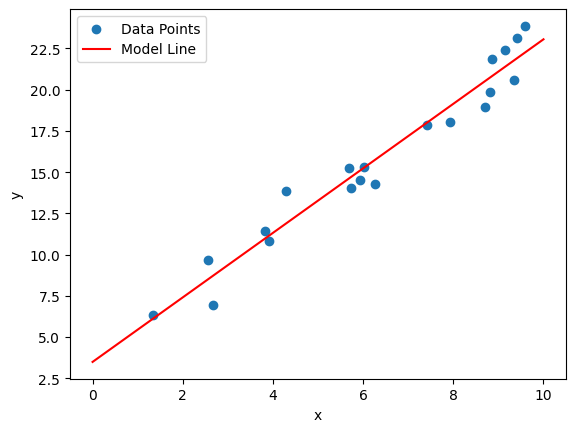

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x.numpy(), y.numpy(), label='Data Points')

# 生成用于绘制直线的x值（一系列连续值）
x_line = torch.linspace(0, 10, 100)

# 计算对应的y值，这将使用训练后的参数w和b来预测
y_line = w * x_line + b

# 绘制拟合直线
plt.plot(x_line.numpy(), y_line.detach().numpy(), color='red', label='Model Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

这里用 Matplotlib 展示了对于随机样本的拟合效果

## 线性回归的表示方法

我们已经阐述了线性回归的模型表达式、训练和预测。下面我们解释线性回归与神经网络的联系，以及线性回归的矢量计算表达式。

### 神经网络图

在深度学习中，我们可以使用神经网络图直观地表现模型结构。为了更清晰地展示线性回归作为神经网络的结构，图3.1使用神经网络图表示本节中介绍的线性回归模型。神经网络图隐去了模型参数权重和偏差。


.
<img src="./img/2-1.png">

在上图的神经网络中，输入分别为 $x_1$ 和 $x_2$，因此输入层的输入个数为 2 ，输入个数也叫输入个数也叫特征数或特征向量维度。

图中的网络输出为 $o$ ，输出层的输出个数为1。需要注意的是，我们直接将图3.1中神经网络的输出 o
o 作为线性回归的输出，即 $$\hat{y} = o $$

由于输入层并不涉及计算，按照惯例，上图所示的神经网络的层数为1。所以，线性回归是一个单层神经网络。输出层中负责计算 $o$ 的单元又叫神经元。在线性回归中，$o$ 的计算依赖于 $x_1$ 和 $x_2$ 。也就是说，输出层中的神经元和输入层中各个输入完全连接。因此，这里的输出层又叫全连接层（fully-connected layer）或稠密层（dense layer）

线性回归模型可以被视为最简单形式的神经网络，其中只有一个神经元。这个神经元没有激活函数，或者说它的激活函数是恒等函数（即输入直接等于输出）。在这种情况下，这个单神经元的网络就是一个线性模型，用于对输入特征进行加权求和，然后加上一个偏置项。

前面是一个特征的，现在这里有两个输入，因此我们来看看两个特征的。这里我们直接用 PyTorch 的线性模型 nn.linear

Epoch 0: loss = 1163.547607421875
Epoch 10000: loss = 1.7309751510620117
Epoch 20000: loss = 1.3625645637512207
Epoch 30000: loss = 1.1116286516189575
Epoch 40000: loss = 0.9406984448432922
Epoch 50000: loss = 0.8242791295051575
Epoch 60000: loss = 0.7449818253517151
Epoch 70000: loss = 0.6909711956977844
Epoch 80000: loss = 0.6541810631752014
Epoch 90000: loss = 0.6291215419769287


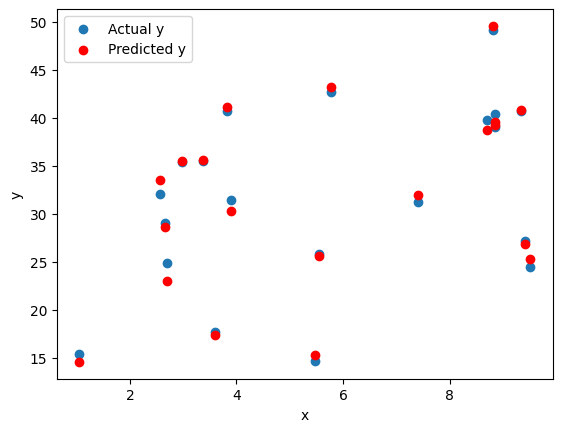

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 设置随机种子以确保结果的可复现性
torch.manual_seed(42)

# 创建一个数据集
x = torch.rand(20, 2) * 10  # 假设有两个特征，20个样本
y = 2 * x[:, 0] + 3 * x[:, 1] + 4 + torch.randn(20)  # y = 2x1 + 3x2 + 4 + 噪声

# 定义一个简单的线性层作为单层感知器，输入特征维度为2，输出维度为1
model = nn.Linear(in_features=2, out_features=1)

# 设置学习率
learning_rate = 0.0001

# 使用均方误差作为损失函数
criterion = nn.MSELoss()

# 使用随机梯度下降作为优化器
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 100000

# 训练模型
for epoch in range(epochs):
    # 前向传播
    y_pred = model(x)
    
    # 计算损失
    loss = criterion(y_pred, y.unsqueeze(1))  # y需要被调整为相同的形状
    
    # 清空上一步的梯度
    optimizer.zero_grad()
    
    # 反向传播
    loss.backward()
    
    # 更新权重
    optimizer.step()

    if epoch % (epochs/10) == 0:
        print(f'Epoch {epoch}: loss = {loss.item()}')

# 绘制预测与实际数据点
predicted = model(x).detach()  # 预测值

plt.scatter(x[:, 0].numpy(), y.numpy(), label='Actual y')
plt.scatter(x[:, 0].numpy(), predicted.numpy(), label='Predicted y', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


然后我们看看这次的 torchviz 是什么样的

In [ ]:
from torchviz import make_dot

# 使用torchviz生成计算图
y_dummy = model(x)
dot = make_dot(y_dummy, params=dict(list(model.named_parameters())))
dot.format = 'png'
dot.render('./img/2-perceptron_computation_graph')

dot.view()

如图咯，这次肯定能看懂了

.
<img src="./img/2-perceptron_computation_graph.png">

### 矢量计算表达式

在模型训练或预测时，我们常常会同时处理多个数据样本并用到矢量计算。在介绍线性回归的矢量计算表达式之前，让我们先考虑对两个向量相加的两种方法。

下面先定义两个1000维的向量。

In [ ]:
import torch
from time import time

a = torch.ones(1000)
b = torch.ones(1000)


向量相加的一种方法是，将这两个向量按元素逐一做标量加法。

In [ ]:
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)


向量相加的另一种方法是，将这两个向量直接做矢量加法。

In [ ]:
start = time()
d = a + b
print(time() - start)


结果很明显，后者比前者更省时。因此，我们应该尽可能采用矢量计算，以提升计算效率。

让我们再次回到本节的房价预测问题。如果我们对训练数据集里的3个房屋样本（索引分别为1、2和3）逐一预测价格，将得到

$$
\hat{y}^{(1)} = x_1^{(1)} w_1 + x_2^{(1)} w_2 + b,
$$

$$
\hat{y}^{(2)} = x_1^{(2)} w_1 + x_2^{(2)} w_2 + b,
$$

$$
\hat{y}^{(3)} = x_1^{(3)} w_1 + x_2^{(3)} w_2 + b.
$$

现在，我们将上面3个等式转化成矢量计算。设
$$
\hat{\mathbf{y}} = 
\begin{bmatrix}
\hat{y}^{(1)} \\
\hat{y}^{(2)} \\
\hat{y}^{(3)}
\end{bmatrix},

\quad
\mathbf{X} = 
\begin{bmatrix}
x_1^{(1)} & x_2^{(1)} \\
x_1^{(2)} & x_2^{(2)} \\
x_1^{(3)} & x_2^{(3)}
\end{bmatrix},

\quad
\mathbf{\omega} = 
\begin{bmatrix}
w_1 \\
w_2
\end{bmatrix}
$$


In [ ]:
a = torch.ones(3)
b = 10
print(a + b)


线性回归的矢量


.
<img src="./img/2-2.png">

Q: 矢量的损失函数相较于标量是如何计算的？

.
<img src="./img/2-3.png">

Q: 这里的“计算差异向量元素平方，然后将这些平方相加，得到总和 $S = \mathbf{d}^T \mathbf{d} $” 可以给我一个例子讲一下吗


.
<img src="./img/2-4.png">

Q: 小批量随机梯度下降的迭代步骤依然是求偏导吗，这里是根据谁求偏导

A: 小批量随机梯度下降（Mini-batch Stochastic Gradient Descent, SGD）是一种优化算法，用于训练各种类型的机器学习模型，尤其是深度学习网络。在小批量SGD中，我们不是用整个数据集来计算损失函数的梯度（如标准的批量梯度下降所做的），也不是仅用一个样本（如随机梯度下降所做的），而是用一个小批量的样本来估算梯度并更新模型参数。这样做既可以减少计算资源的需求，也可以增加梯度估计的稳定性。

A: 下面是小批量SGD的基本步骤
    1. 随机选择一个小批量数据：从训练集中随机选择一个包含 $\mathbf{B}$ 个样本的小批量数据。这个小批量通常记作 $\mathbf{B}$ 
    2. 计算损失函数的梯度：对于选中的小批量 $\mathbf{B}$ 计算模型损失函数相对于参数的梯度 $∇_θ ℓ^(i) (θ)$ , 其中$\theta$ 表示模型参数，例如前面的权重 $\omega$ 和 偏置 $b$ ，这里 $ℓ^(i)$ 是第 $i$ 个样本的损失，梯度是损失函数对每个参数的偏导数的向量，表示损失函数在参数空间中增加最快的方向。
    3. 计算梯度的平均值：梯度是损失函数对每个参数的偏导数的向量，表示损失函数在参数空间中增加最快的方向。这个平均值即为

    $$
    \nabla_{\theta}\ell(\mathcal{B}) = \frac{1}{|\mathcal{B}|} \sum_{i\in\mathcal{B}} \nabla_{\theta}\ell^{(i)}(\theta)
    $$
    
最后使用这样的规则来更新模型参数，这里 \eta 是学习率
    
    $$
    \theta \leftarrow \theta - \eta \cdot \nabla_{\theta}\ell(\mathcal{B})
    $$


### 小结

1. 和大多数深度学习模型一样，对于线性回归这样一种单层神经网络，它的基本要素包括模型、训练数据、损失函数和优化算法。
2. 既可以用神经网络图表示线性回归，又可以用矢量计算表示该模型。
3. 应该尽可能采用矢量计算，以提升计算效率。

# 先说结论，下面的例子还不如上面写过的例子，可以不用看


## 线性回归的从零开始实现

在了解了线性回归的背景知识之后，现在我们可以动手实现它了。尽管强大的深度学习框架可以减少大量重复性工作，但若过于依赖它提供的便利，会导致我们很难深入理解深度学习是如何工作的。因此，本节将介绍如何只利用 Tensor 和 autograd 来实现一个线性回归的训练。

先导包

In [ ]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random


### 生成数据集

.
<img src="./img/2-5.png">


In [ ]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)


注意，features的每一行是一个长度为2的向量，而labels的每一行是一个长度为1的向量（标量）。


.
<img src="./img/2-6.png">

In [ ]:
print(features[0], labels[0])


通过生成第二个特征features[:, 1]和标签 labels 的散点图，可以更直观地观察两者间的线性关系。

In [ ]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上面两个函数后就可以这样导入
# import sys
# sys.path.append("..")
# from d2lzh_pytorch import * 

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);


这里需要配置下d2lzh_pytorch

https://blog.csdn.net/NEUQ_snowy/article/details/123969408



In [ ]:
import d2lzh_pytorch

### 读取数据

在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数：它每次返回batch_size（批量大小）个随机样本的特征和标签。


In [ ]:
# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

# 读取第一个小样本并打印
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break



.
<img src="./img/2-7.png">

### 初始化模型参数

我们将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化成0。

之后的模型训练中，需要对这些参数求梯度来迭代参数的值，因此我们要让它们的requires_grad=True。


In [ ]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

w,b 

### 定义模型

下面是线性回归的矢量计算表达式的实现。我们使用mm函数做矩阵乘法。

In [ ]:
def linreg(X, w, b):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b


### 定义损失函数

我们使用上一节描述的平方损失来定义线性回归的损失函数。在实现中，我们需要把真实值 $y$ 变形成预测值$ \hat{y} $的形状。以下函数返回的结果也将和 $\hat{y}$ 的形状相同。

In [ ]:
def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2


### 定义优化算法

以下的sgd函数实现了上一节中介绍的小批量随机梯度下降算法。它通过不断迭代模型参数来优化损失函数。这里自动求梯度模块计算得来的梯度是一个批量样本的梯度和。我们将它除以批量大小来得到平均值。

In [ ]:
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data


### 训练模型

在训练中，我们将多次迭代模型参数。在每次迭代中，我们根据当前读取的小批量数据样本（特征X和标签y），通过调用反向函数backward计算小批量随机梯度，并调用优化算法sgd迭代模型参数。由于我们之前设批量大小batch_size为10，每个小批量的损失l的形状为(10, 1)。回忆一下自动求梯度一节。由于变量l并不是一个标量，所以我们可以调用.sum()将其求和得到一个标量，再运行l.backward()得到该变量有关模型参数的梯度。注意在每次更新完参数后不要忘了将参数的梯度清零。

在一个迭代周期（epoch）中，我们将完整遍历一遍data_iter函数，并对训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。这里的迭代周期个数num_epochs和学习率lr都是超参数，分别设3和0.03。在实践中，大多超参数都需要通过反复试错来不断调节。虽然迭代周期数设得越大模型可能越有效，但是训练时间可能过长。学习率对模型的影响则主要在收敛速度上

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg

def squared_loss(y_hat, y):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))


训练完成后，我们可以比较学到的参数和用来生成训练集的真实参数。它们应该很接近。

In [ ]:
print(true_w, '\n', w)
print(true_b, '\n', b)


# 线性回归的简洁实现

在本节中，我们将介绍如何使用 PyTorch 更方便地实现线性回归的训练。

### 生成数据集

和上一节相同，其中features是训练数据特征，labels是标签。

In [ ]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)


### 读取数据
PyTorch提供了data包来读取数据。由于data常用作变量名，我们将导入的data模块用Data代替。在每一次迭代中，我们将随机读取包含10个数据样本的小批量。

In [ ]:
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)


这里data_iter的使用跟上一节中的一样。让我们读取并打印第一个小批量数据样本。

In [ ]:
for X, y in data_iter:
    print(X, y)
    break


### 定义模型

在上一节从零开始的实现中，我们需要定义模型参数，并使用它们一步步描述模型是怎样计算的。当模型结构变得更复杂时，这些步骤将变得更繁琐。其实，PyTorch提供了大量预定义的层，这使我们只需关注使用哪些层来构造模型。下面将介绍如何使用PyTorch更简洁地定义线性回归。

首先，导入torch.nn模块。实际上，“nn”是neural networks（神经网络）的缩写。顾名思义，该模块定义了大量神经网络的层。之前我们已经用过了autograd，而nn就是利用autograd来定义模型。nn的核心数据结构是Module，它是一个抽象概念，既可以表示神经网络中的某个层（layer），也可以表示一个包含很多层的神经网络。在实际使用中，最常见的做法是继承nn.Module，撰写自己的网络/层。一个nn.Module实例应该包含一些层以及返回输出的前向传播（forward）方法。下面先来看看如何用nn.Module实现一个线性回归模型。

In [ ]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net) # 使用print可以打印出网络的结构


事实上我们还可以用nn.Sequential来更加方便地搭建网络，Sequential是一个有序的容器，网络层将按照在传入Sequential的顺序依次被添加到计算图中。

In [ ]:
# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以传入其他层
    )

# 写法二
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# 写法三
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

print(net)
print(net[0])



可以通过net.parameters()来查看模型所有的可学习参数，此函数将返回一个生成器。

In [ ]:
for param in net.parameters():
    print(param)


作为一个单层神经网络，线性回归输出层中的神经元和输入层中各个输入完全连接。因此，线性回归的输出层又叫全连接层。

注意：torch.nn仅支持输入一个batch的样本不支持单个样本输入，如果只有单个样本，可使用input.unsqueeze(0)来添加一维。

# 初始化模型参数

在使用 net 前，我们需要初始化模型参数，如线性回归模型中的权重和偏差。PyTorch在init模块中提供了多种参数初始化方法。这里的init是initializer的缩写形式。我们通过init.normal_将权重参数每个元素初始化为随机采样于均值为0、标准差为0.01的正态分布。偏差会初始化为零。

In [ ]:
 from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)  # 也可以直接修改bias的data: net[0].bias.data.fill_(0)


### 定义损失函数

PyTorch在nn模块中提供了各种损失函数，这些损失函数可看作是一种特殊的层，PyTorch也将这些损失函数实现为nn.Module的子类。我们现在使用它提供的均方误差损失作为模型的损失函数。

In [ ]:
loss = nn.MSELoss()


### 定义优化算法

同样，我们也无须自己实现小批量随机梯度下降算法。torch.optim模块提供了很多常用的优化算法比如SGD、Adam和RMSProp等。下面我们创建一个用于优化net所有参数的优化器实例，并指定学习率为0.03的小批量随机梯度下降（SGD）为优化算法。

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)


有时候我们不想让学习率固定成一个常数，那如何调整学习率呢？主要有两种做法。一种是修改optimizer.param_groups中对应的学习率，另一种是更简单也是较为推荐的做法——新建优化器，由于optimizer十分轻量级，构建开销很小，故而可以构建新的optimizer。但是后者对于使用动量的优化器（如Adam），会丢失动量等状态信息，可能会造成损失函数的收敛出现震荡等情况。

In [ ]:
# 调整学习率
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.1 # 学习率为之前的0.1倍


在使用Gluon训练模型时，我们通过调用optim实例的step函数来迭代模型参数。按照小批量随机梯度下降的定义，我们在step函数中指明批量大小，从而对批量中样本梯度求平均。

In [ ]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))


下面我们分别比较学到的模型参数和真实的模型参数。我们从net获得需要的层，并访问其权重（weight）和偏差（bias）。学到的参数和真实的参数很接近。

In [ ]:
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)


## 小结
使用PyTorch可以更简洁地实现模型。
torch.utils.data模块提供了有关数据处理的工具，torch.nn模块定义了大量神经网络的层，torch.nn.init模块定义了各种初始化方法，torch.optim模块提供了很多常用的优化算法。

In [ ]:
# 生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

# 读取数据
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

# 打印一小段
for X, y in data_iter:
    print(X, y)
    break
    
# 定义模型
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net) # 使用print可以打印出网络的结构

# 用nn.Sequential来更加方便地搭建网络 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以传入其他层
    )

# 通过net.parameters()来查看模型所有的可学习参数
for param in net.parameters():
    print(param)

# 初始化模型参数
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)  # 也可以直接修改bias的data: net[0].bias.data.fill_(0)

# 定义损失函数
loss = nn.MSELoss()

# 定义优化算法
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

# 调整学习率
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.1 # 学习率为之前的0.1倍

# 训练模型
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)


# 自己实现

In [ ]:
from sklearn.datasets import make_regression
import torch


# 用 sklearn 的 make regression 生成数据集
# 生成回归数据集
X, y = make_regression(n_samples=1000, n_features=2, noise=0.1, random_state=42)

# 将数据集转换为PyTorch张量
features = torch.tensor(X, dtype=torch.float32)
labels = torch.tensor(y, dtype=torch.float32).view(-1, 1)

print(X.shape)
print(y.shape)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# 为了 SGD 做准备，需要创建dataloader

# 使用TensorDataset封装features和labels
dataset = TensorDataset(features, labels)
# 创建一个DataLoader来批量加载数据
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
import torch.nn as nn

# 定义模型，使用 Sequential 类
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=1)
)


In [ ]:
import torch.optim as optim
# 定义损失函数

# 定义优化器
# 定义损失函数为均方误差
loss_fn = nn.MSELoss()
# 定义优化器为SGD，模型的参数传递给优化器，设置学习率
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [ ]:
# 开始训练

# 记录每个loss损失
all_losses = []

# 设置训练的轮数
num_epochs = 1000
for epoch in range(num_epochs):
    for batch_features, batch_labels in dataloader:
        # 前向传播
        predictions = model(batch_features)
        loss = loss_fn(predictions, batch_labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # 记录损失
    all_losses.append(loss.item())
    
    # 打印每个epoch的损失
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Q: 给我详细讲讲SGD这个优化器，和以往的直接 值减去偏导 的优化器有什么不一样

A: 随机梯度下降（Stochastic Gradient Descent，SGD）是一种用于优化神经网络参数的方法，特别是在数据集很大时。SGD的关键思想是，每次更新参数时不是基于整个数据集计算损失函数的梯度（这在大数据集上非常昂贵），而是随机选择一个样本（或一小批样本，称为mini-batch）来近似梯度。这样做有几个主要的好处：

速度快：每次迭代的计算成本小，因为只处理一小部分数据。
减少内存需求：不需要在内存中同时处理整个数据集。
频繁更新：更频繁地更新模型参数，可以更快地看到模型性能的改进。
降低过拟合：随机性可以增加模型的泛化能力。
传统的批量梯度下降（Batch Gradient Descent）在每次迭代中使用整个数据集来计算梯度和更新参数，这会导致以下几个问题：

对于非常大的数据集，可能无法将整个数据集加载到内存中。
计算梯度需要处理整个数据集，因此计算速度慢，迭代次数少。
梯度计算可能会陷入局部最小值，因为总是沿着降低整个数据集损失的方向更新。
SGD在实际应用中经常被用来取代批量梯度下降，但SGD本身也存在一些问题，比如：

高方差：更新可能会有很大波动，这可能会导致收敛到最小值的路径变得曲折。
可能会困在鞍点：当梯度为零但不是最优点时，SGD有困在鞍点的风险。
学习率选择：需要仔细选择学习率，过高可能导致解不稳定，过低又可能导致训练过程缓慢。
为了解决这些问题，有许多SGD的变体被提出，比如带有动量的SGD（Momentum SGD），它可以帮助加速SGD在相关方向上的收敛，并减少震荡，以及Adam、RMSprop等更高级的优化器，它们结合了多种技术来改善收敛性能。

在实践中，SGD仍然是一种非常流行的优化方法，尤其是当应用于小批量数据时。通过小批量，我们可以取得计算单个样本和整个数据集的好处，同时避免两者的主要缺点。